In [60]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import json
import requests
from pprint import pprint

api_key = "221ed197cb04a8ffb82673bfdf56ce5b"


# Save config information
url = "http://api.openweathermap.org/data/2.5/weather?"
city = "Princeton"
unit = "imperial"


# Build query URL
query_url = url + "appid=" + api_key +"&q=" + city 

In [61]:
# experiment with API to learn structure - full string from Postman
query_url = "http://api.openweathermap.org/data/2.5/weather?units=metric&appid=221ed197cb04a8ffb82673bfdf56ce5b&q=New York"

In [64]:
# problematic for two word cities (e.g. New York)
query_url = f"{url}units={unit}&appid={api_key}&q={city}"
print(query_url)

http://api.openweathermap.org/data/2.5/weather?units=imperial&appid=221ed197cb04a8ffb82673bfdf56ce5b&q=Princeton


In [65]:
# Get weather data
weather_response = requests.get(query_url)
weather_json = weather_response.json()

# Get the temperature from the response
print(f"The weather API responded with: {weather_json}.")

The weather API responded with: {'coord': {'lon': -74.66, 'lat': 40.35}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': 39.85, 'feels_like': 23.86, 'temp_min': 37, 'temp_max': 43, 'pressure': 1012, 'humidity': 44}, 'visibility': 16093, 'wind': {'speed': 19.46, 'deg': 340, 'gust': 32.21}, 'clouds': {'all': 90}, 'dt': 1578242454, 'sys': {'type': 1, 'id': 4686, 'country': 'US', 'sunrise': 1578226900, 'sunset': 1578260738}, 'timezone': -18000, 'id': 5102922, 'name': 'Princeton', 'cod': 200}.


In [66]:
print(f"The weather API responded with: {weather_response}")

pprint(weather_json)

The weather API responded with: <Response [200]>
{'base': 'stations',
 'clouds': {'all': 90},
 'cod': 200,
 'coord': {'lat': 40.35, 'lon': -74.66},
 'dt': 1578242454,
 'id': 5102922,
 'main': {'feels_like': 23.86,
          'humidity': 44,
          'pressure': 1012,
          'temp': 39.85,
          'temp_max': 43,
          'temp_min': 37},
 'name': 'Princeton',
 'sys': {'country': 'US',
         'id': 4686,
         'sunrise': 1578226900,
         'sunset': 1578260738,
         'type': 1},
 'timezone': -18000,
 'visibility': 16093,
 'weather': [{'description': 'overcast clouds',
              'icon': '04d',
              'id': 804,
              'main': 'Clouds'}],
 'wind': {'deg': 340, 'gust': 32.21, 'speed': 19.46}}


In [77]:
# practice extracting relevant info
# want temp (F) vs lat, humidity vs lat, cloudiness vs lat, wind speed (mph) vs lat

# will want to append all of these into lists

city = weather_json["name"]
lat = weather_json["coord"]["lat"]

temp = weather_json["main"]["temp"]
humidity = weather_json["main"]["humidity"]
wind = weather_json["wind"]["speed"]
clouds = weather_json["clouds"]["all"]



In [78]:
from citipy import citipy

In [82]:
city = citipy.nearest_city(40.35,-74.66)
city.city_name
city.country_code

'us'

In [134]:
## Pseudo Code ##

# randomly generate two numbers
# try citypy to see if it is a city with population >500
# make api call
    # append lists with temp, humidity, etc. data. also append lists with city/country, lat/long data
    # repeat for 500 cities - probably need a counter bc we don't know how many times the try block will fail
    
    
# latitude ranges from +/- 90
# longitude ranges from +/- 180

lat = np.random.randint(-90, 90) + np.round(np.random.random_sample(),2)
long = np.random.randint(-180,180) + np.round(np.random.random_sample(),2)

print(f"{lat},{long}")

11.33,-172.1


In [135]:
try:
    city = citipy.nearest_city(lat,long)
    print(city.city_name)
    print(city.country_code)
    # increment counter here
    # append lists here
except:
    print("Not a city with population greater than 500")
    

kapaa
us


In [141]:
# let's try an API call with this random city - calling lat/long will remove two name city problem
query_url = f"{url}lat={lat}&lon={long}&units={unit}&appid={api_key}"
print(query_url)

http://api.openweathermap.org/data/2.5/weather?lat=11.33&lon=-172.1&units=imperial&appid=221ed197cb04a8ffb82673bfdf56ce5b


In [142]:
weather_requests = requests.get(query_url)
weather_json = weather_requests.json()

In [143]:
pprint(weather_json)

{'base': 'model',
 'clouds': {'all': 63},
 'cod': 200,
 'coord': {'lat': 11.33, 'lon': -172.1},
 'dt': 1578244031,
 'id': 0,
 'main': {'feels_like': 73.89,
          'grnd_level': 1013,
          'humidity': 77,
          'pressure': 1013,
          'sea_level': 1013,
          'temp': 80.91,
          'temp_max': 80.91,
          'temp_min': 80.91},
 'name': '',
 'rain': {'3h': 0.19},
 'sys': {'sunrise': 1578246541, 'sunset': 1578287884},
 'timezone': -39600,
 'weather': [{'description': 'light rain',
              'icon': '10n',
              'id': 500,
              'main': 'Rain'}],
 'wind': {'deg': 60, 'speed': 28.83}}


In [160]:
# preallocate lists for temp, humidity, etc.
cities = []
countries = []
temperature = []
humidity = []
wind_speed = []
cloud_percentage = []
latitude = []
longitude = []

# preallocate counter for while loop
counter = 0
while counter < 500:
    # randomly generate some latitude and longitude values
    # by randomly selecting an integer in lat/long range and 
    # appending random two decimal points
    lat = np.random.randint(-90, 90) + np.round(np.random.random_sample(),2)
    long = np.random.randint(-180,180) + np.round(np.random.random_sample(),2)
    
    # put code in try/except block because it is possible that randomly generated
    # lat/long coords are not a city (e.g. in an ocean) or have less than 500 people
    try:
        # get city name from citipy - if this fails, then the city does not exist
        city = citipy.nearest_city(lat,long)
        
        # create query url with lat/long, imperial units, and API key
        query_url = f"{url}lat={lat}&lon={long}&units={unit}&appid={api_key}"
        
        # make API request
        weather_requests = requests.get(query_url)
        weather_json = weather_requests.json()
        
        # extract data from json for this city
        temp = weather_json["main"]["temp"]
        humid = weather_json["main"]["humidity"]
        wind = weather_json["wind"]["speed"]
        clouds = weather_json["clouds"]["all"]
        
        # store data into lists
        cities.append(city.city_name)
        countries.append(city.country_code)
        
        temperature.append(temp)
        humidity.append(humid)
        wind_speed.append(wind)
        cloud_percentage.append(clouds)
        
        latitude.append(lat)
        longitude.append(long)
        
        # iterate counter for while loop
        counter += 1
    except: 
        print("error - city does not exist or population is less than 500")
    
    
    

In [161]:
# create dataframe to hold all this data
df = pd.DataFrame({"City": cities, "Country": countries, "Latitude": latitude, "Longitude": longitude,
                   "Temperature": temperature,"Humidity": humidity, "Cloudiness": cloud_percentage, 
                   "Wind": wind_speed})

# save df - so we don't have to make future API calls
df.to_csv("Weather_data.csv",index=False)
df.head()

,City,Country,Latitude,Longitude,Temperature,Humidity,Cloudiness,Wind
0,praia da vitoria,pt,40.63,-26.51,62.15,90,100,23.17
1,berlevag,no,74.66,29.48,19.74,75,100,18.03
2,rikitea,pf,-23.98,-123.77,74.17,68,98,14.56
3,ranot,th,8.03,100.80,79.99,82,77,13.91
4,atuona,pf,-4.08,-121.40,76.55,81,65,15.84


## Latitude VS Temperature

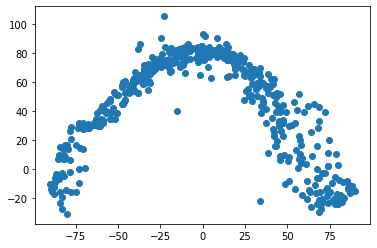

In [171]:
plt.figure()
plt.scatter(list(df["Latitude"]), list(df["Temperature"]))
plt.show()

## Latitude VS Humidity

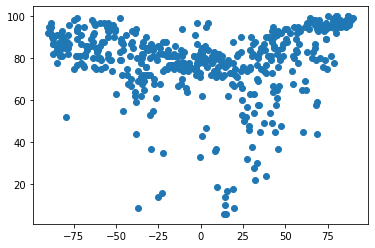

In [172]:
plt.figure()
plt.scatter(list(df["Latitude"]), list(df["Humidity"]))
plt.show()

## Latitude VS Wind Speed

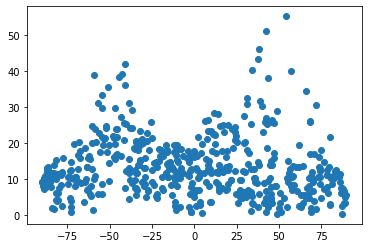

In [173]:
plt.figure()
plt.scatter(list(df["Latitude"]), list(df["Wind"]))
plt.show()

## Latitude VS Cloudiness

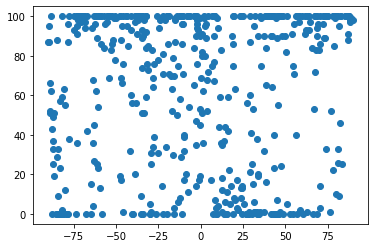

In [174]:
plt.figure()
plt.scatter(list(df["Latitude"]), list(df["Cloudiness"]))
plt.show()